In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

import helper as hlp

%matplotlib inline
plt.style.use('seaborn-poster')

In [3]:
boston_listings = pd.read_csv('data/boston/listings.csv', parse_dates=True)
seattle_listings = pd.read_csv('data/seattle/listings.csv', parse_dates=True)

## Assess the data

In [4]:
boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
boston_listings.dtypes.value_counts()

object     62
float64    18
int64      15
dtype: int64

In [6]:
boston_listings = boston_listings.apply(lambda col: pd.to_datetime(col, errors='ignore')
              if col.dtypes == object 
              else col, 
              axis=0)
boston_listings.dtypes.value_counts()

object            57
float64           18
int64             15
datetime64[ns]     5
dtype: int64

In [7]:
print(boston_listings.shape)
print(seattle_listings.shape)

(3585, 95)
(3818, 92)


In [8]:
seattle_listings = seattle_listings.apply(hlp.parse_df_dates)

In [9]:
seattle_listings.dtypes.value_counts()

object            57
float64           17
int64             13
datetime64[ns]     5
dtype: int64

In [10]:
boston_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [11]:
print(boston_listings['last_scraped'].min())
print(boston_listings['last_scraped'].max())

2016-09-07 00:00:00
2016-09-07 00:00:00


In [12]:
seattle_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [13]:
print(seattle_listings['last_scraped'].min())
print(seattle_listings['last_scraped'].max())

2016-01-04 00:00:00
2016-01-04 00:00:00


In [14]:
boston_calendar = pd.read_csv('data/boston/calendar.csv')
boston_reviews = pd.read_csv('data/boston/reviews.csv')
seattle_calendar = pd.read_csv('data/seattle/calendar.csv')
seattle_reviews = pd.read_csv('data/seattle/reviews.csv')

In [15]:
print('Boston calendar entries', boston_calendar.shape)
print('Boston reviews entries', boston_reviews.shape)
print('Seattle calendar entries', seattle_calendar.shape)
print('Seattle reviews entries', seattle_reviews.shape)

Boston calendar entries (1308890, 4)
Boston reviews entries (68275, 6)
Seattle calendar entries (1393570, 4)
Seattle reviews entries (84849, 6)


In [16]:
boston_reviews['listing_id'].nunique()

2829

In [17]:
boston_reviews = boston_reviews.apply(hlp.parse_df_dates)
print(boston_reviews['date'].min())
print(boston_reviews['date'].max())
boston_calendar = boston_calendar.apply(hlp.parse_df_dates)
print(boston_calendar['date'].min())
print(boston_calendar['date'].max())

2009-03-21 00:00:00
2016-09-06 00:00:00
2016-09-06 00:00:00
2017-09-05 00:00:00


In [18]:
seattle_reviews['listing_id'].nunique()

3191

In [19]:
seattle_calendar = seattle_calendar.apply(hlp.parse_df_dates)
print(seattle_calendar['date'].min())
print(seattle_calendar['date'].max())
seattle_reviews = seattle_reviews.apply(hlp.parse_df_dates)
print(seattle_reviews['date'].min())
print(seattle_reviews['date'].max())

2016-01-04 00:00:00
2017-01-02 00:00:00
2009-06-07 00:00:00
2016-01-03 00:00:00


In [20]:
cols_with_nulls = boston_listings.columns[boston_listings.isnull().any()]

df_with_nulls = boston_listings[cols_with_nulls.tolist()]

hlp.get_missing_percentage_sorted(df_with_nulls)

city                            0.0006
property_type                   0.0008
beds                            0.0025
bedrooms                        0.0028
host_location                   0.0031
market                          0.0039
bathrooms                       0.0039
zipcode                         0.0106
summary                         0.0399
host_neighbourhood              0.0946
host_response_time              0.1314
host_response_rate              0.1314
host_acceptance_rate            0.1314
neighbourhood                   0.1515
medium_url                      0.1671
xl_picture_url                  0.1671
thumbnail_url                   0.1671
last_review                     0.2109
first_review                    0.2109
reviews_per_month               0.2109
review_scores_rating            0.2268
review_scores_communication     0.2282
review_scores_cleanliness       0.2282
review_scores_checkin           0.2287
review_scores_value             0.2290
review_scores_location   

In [23]:
#For development
#import importlib
#importlib.reload(hlp)

In [25]:
hlp.get_redundant_cols(boston_listings)

Index(['scrape_id', 'last_scraped', 'experiences_offered', 'state',
       'country_code', 'country', 'calendar_last_scraped', 'requires_license'],
      dtype='object')

In [26]:
bos_cols_to_be_dropped = ['neighbourhood_group_cleansed', 'has_availability', 'license', 'jurisdiction_names',
                     'scrape_id', 'last_scraped', 
                     'listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
                     'requires_license', 'country_code' , 'country']

In [27]:
cols_with_nulls = seattle_listings.columns[seattle_listings.isnull().any()]

df_with_nulls = seattle_listings[cols_with_nulls.tolist()]

hlp.get_missing_percentage_sorted(df_with_nulls)

beds                           0.0003
property_type                  0.0003
host_identity_verified         0.0005
host_has_profile_pic           0.0005
host_total_listings_count      0.0005
host_name                      0.0005
host_since                     0.0005
host_listings_count            0.0005
host_picture_url               0.0005
host_thumbnail_url             0.0005
host_is_superhost              0.0005
bedrooms                       0.0016
zipcode                        0.0018
host_location                  0.0021
bathrooms                      0.0042
summary                        0.0464
host_neighbourhood             0.0786
xl_picture_url                 0.0838
medium_url                     0.0838
thumbnail_url                  0.0838
neighbourhood                  0.1090
host_response_rate             0.1370
host_response_time             0.1370
space                          0.1490
last_review                    0.1642
first_review                   0.1642
reviews_per_

In [28]:
hlp.get_redundant_cols(seattle_listings)

Index(['scrape_id', 'last_scraped', 'experiences_offered', 'market',
       'country_code', 'country', 'has_availability', 'calendar_last_scraped',
       'requires_license', 'jurisdiction_names'],
      dtype='object')

In [30]:
sea_cols_to_be_dropped = ['license', 
                     'scrape_id', 'last_scraped', 'experiences_offered', 'market',
                     'country_code', 'country', 'has_availability', 'calendar_last_scraped',
                     'requires_license', 'jurisdiction_names',
                     'listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
                     'requires_license']
seattle_listings = seattle_listings.drop(sea_cols_to_be_dropped, axis=1)

The Boston data has been scraped on 2016-09-07 and the Seattle data on 2016-01-04 and is available for a year.
There are a total of 3585 Boston listings and 3818 Seattle listings.

**Boston**
The reviews data basically has reviews for some listings, not all. Here it has for 2829 listings out of 3585. 
The reviews provided span over 7 years from 2009 to 2016.
The booking date ia available for the following time period - Sep 2016 to Sep 2017

**Seattle**
The reviews are available for 3191 listings out of 3818 listings. The review data spans the same 7 years as the Boston data. And the booking data is available for the time period - Jan 2016 - Jan 2017

From the description above it is clear that there are certain columns which may not be necessary or may not 
provide value to the analysis. This could be because of the following reasons - 
- All values are null - license
- Redundant - all columns have the same values - experiences_offered
- Not relevant - will not be using to gather/scrape more data - listing_url, medium_url
- Not relevant - does not add to analysis - scrape_id

We may go ahead and drop more data which may not have a bearing on our analysis later

## Explore

### Trends in Price, Availability and Distibution of Listings

### A. Price Trends

#### 1. Seasonal Price Trends

In [32]:
boston_calendar.loc[:, 'price'] = boston_calendar['price'].replace( '[\$,)]','', regex=True )
boston_calendar.loc[:, 'price'] = boston_calendar['price'].astype('float64')
#boston_calendar = boston_calendar.apply(hlp.parse_df_dates)

In [46]:
boston_calendar = boston_calendar.apply(lambda col: pd.to_datetime(col, errors='ignore')
              if col.dtypes == object 
              else col, 
              axis=0)

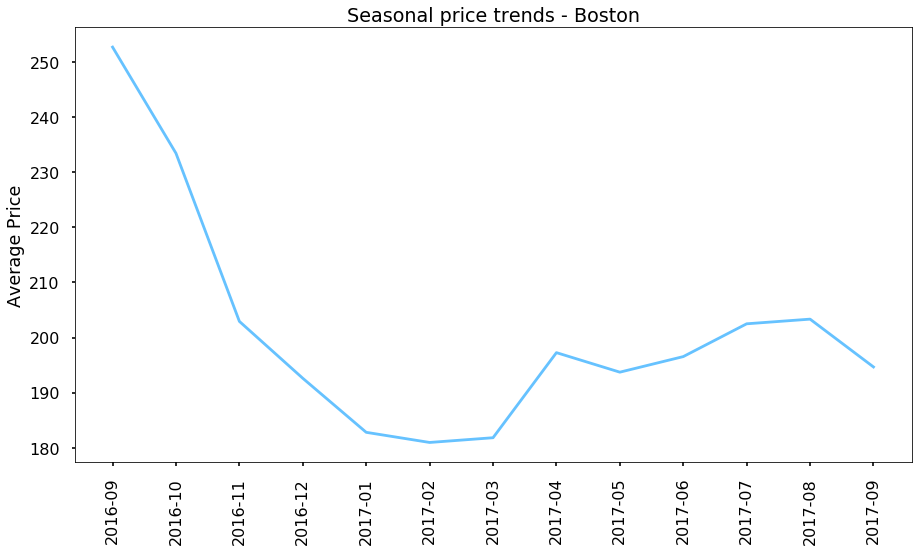

In [51]:
boston_cal_prices = boston_calendar[boston_calendar['available'] == 't'].copy()
boston_cal_prices.loc[:, 'year-mon'] = boston_cal_prices['date'].dt.strftime('%Y-%m')
prices_grouped = boston_cal_prices.groupby('year-mon', as_index=False)[['price']].mean()

plt.figure(figsize =(15,8))
plt.title('Seasonal price trends - Boston')
plt.plot(prices_grouped['year-mon'],prices_grouped['price'],
            color = '#66c2ff') 
plt.ylabel('Average Price')
plt.xticks(prices_grouped['year-mon'], rotation='vertical')
plt.show()

In [52]:
seattle_calendar.loc[:, 'price'] = seattle_calendar['price'].replace( '[\$,)]','', regex=True )
seattle_calendar.loc[:, 'price'] = seattle_calendar['price'].astype('float64')
seattle_calendar = seattle_calendar.apply(hlp.parse_df_dates)

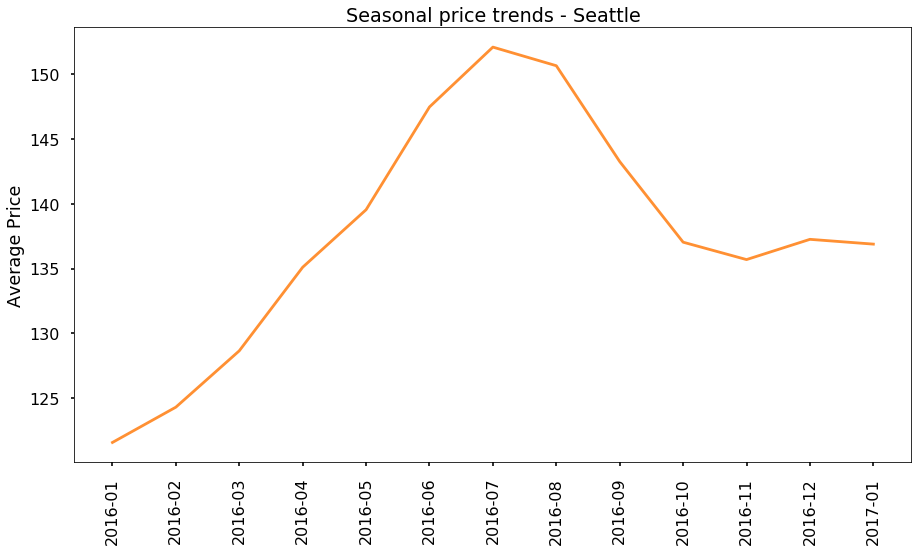

In [53]:
seattle_cal_prices = seattle_calendar[seattle_calendar['available'] == 't'].copy()
seattle_cal_prices['year-mon'] = seattle_cal_prices['date'].dt.strftime('%Y-%m')
prices_grouped_sea = seattle_cal_prices.groupby('year-mon', as_index=False)[['price']].mean()

plt.figure(figsize =(15,8))
plt.title('Seasonal price trends - Seattle')
plt.plot(prices_grouped_sea['year-mon'],prices_grouped_sea['price'],
            color = '#ff9033') 
plt.ylabel('Average Price')
plt.xticks(prices_grouped_sea['year-mon'], rotation='vertical')
plt.show()

#### 2. Weekly Price Trends

In [59]:
boston_cal_prices.loc[:, 'day_of_week'] = boston_cal_prices['date'].dt.weekday_name
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bos_weekly_prices = boston_cal_prices[['day_of_week', 'price']]
bos_weekly_prices = bos_weekly_prices.groupby(['day_of_week'])['price'].mean().reindex(cats)
bos_weekly_prices = bos_weekly_prices.reset_index()

In [60]:
seattle_cal_prices.loc[:, 'day_of_week'] = seattle_cal_prices['date'].dt.weekday_name
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sea_weekly_prices = seattle_cal_prices[['day_of_week', 'price']]
sea_weekly_prices = sea_weekly_prices.groupby(['day_of_week'])['price'].mean().reindex(cats)
sea_weekly_prices = sea_weekly_prices.reset_index()

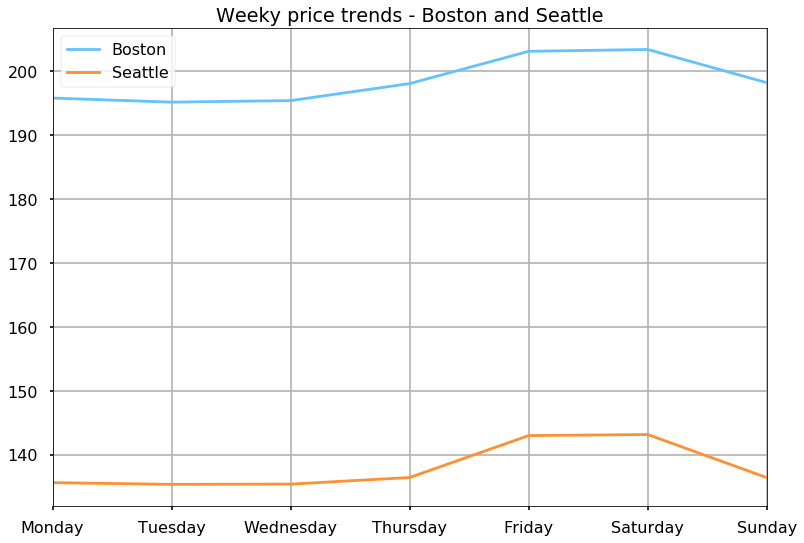

In [63]:
ax = bos_weekly_prices.plot(color='#66c2ff')
sea_weekly_prices.plot(ax=ax, color='#ff9033')

ax.grid(True)
ticks = list(range(0, 7, 1)) 
labels = "Monday Tuesday Wednesday Thursday Friday Saturday Sunday".split()
plt.title('Weeky price trends - Boston and Seattle')
plt.xticks(ticks, labels)
plt.legend(['Boston', 'Seattle']);

### B. Availability

In [54]:
seattle_calendar = seattle_calendar.apply(hlp.parse_df_dates)
seattle_calendar_drop = seattle_calendar[:-2]
available_cal_sea = seattle_calendar[['date', 'available']].copy()
available_cal_sea.loc[:, 'available'] = available_cal_sea.available.replace(('t', 'f'), (1, 0)) 
available_cal_sea = available_cal_sea.groupby(['date']).agg(['sum'])
tot_seattle_listings = seattle_calendar['listing_id'].nunique()
available_cal_sea.loc[:, 'prop_available'] = available_cal_sea['available']['sum']/tot_seattle_listings

days = pd.to_datetime(available_cal_sea.index.values, errors='ignore')
days = sorted(days.to_pydatetime())
days = mdates.date2num(days)

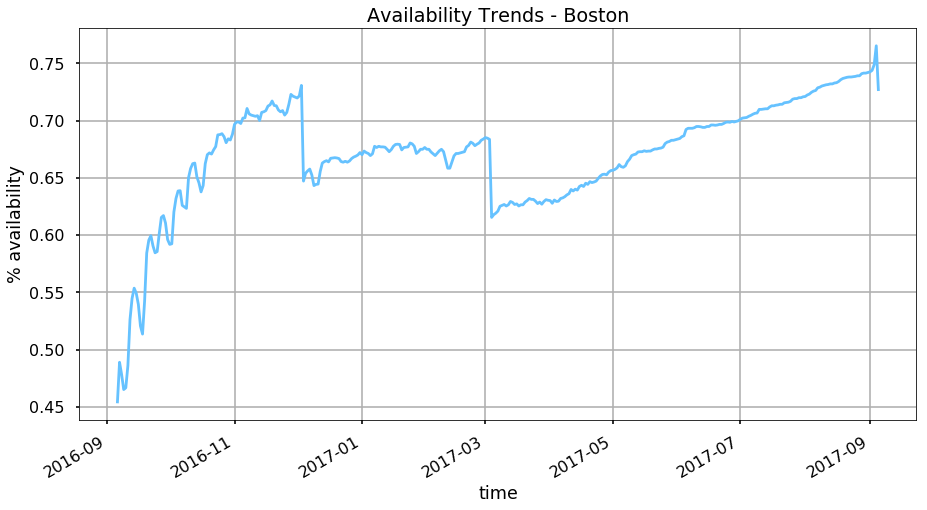

In [64]:
fig, axs = plt.subplots(1,1)
axs.plot_date(days, available_cal_sea.prop_available.tolist(), '-', color='#66c2ff')

axs.autoscale_view()
axs.grid(True)
axs.set_xlabel('time')
axs.set_ylabel('% availability')

fig.adjustable = True
fig.set_size_inches(15, 8) 
fig.autofmt_xdate()
plt.title('Availability Trends - Boston')
plt.show()

In [57]:
boston_calendar = boston_calendar.apply(hlp.parse_df_dates)
available_cal_bos = boston_calendar[['date', 'available']].copy()
available_cal_bos.loc[:, 'available'] = available_cal_bos.available.replace(('t', 'f'), (1, 0)) 
available_cal_bos = available_cal_bos.groupby(['date']).agg(['sum'])
tot_boston_listings = boston_calendar['listing_id'].nunique()
available_cal_bos.loc[:, 'prop_available'] = available_cal_bos['available']['sum']/tot_boston_listings

days = pd.to_datetime(available_cal_bos.index.values, errors='ignore')
days = sorted(days.to_pydatetime())
days = mdates.date2num(days)

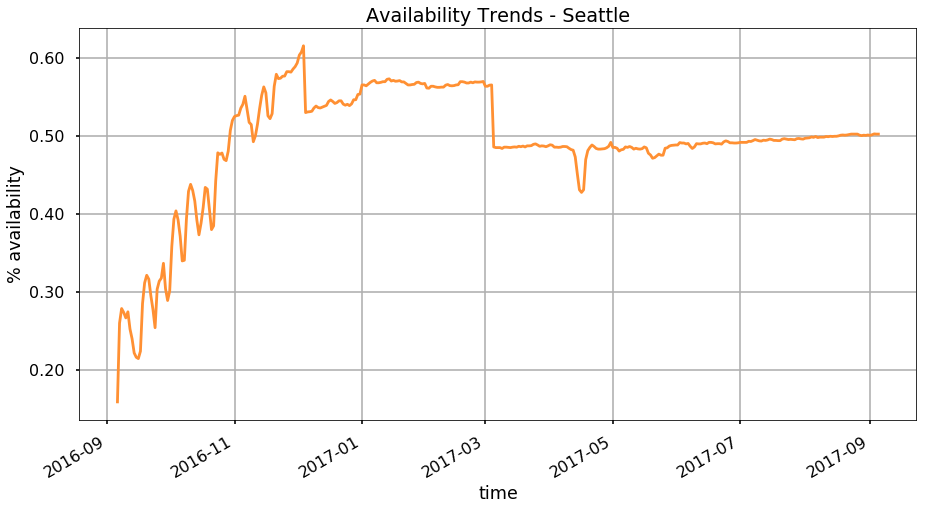

In [67]:
fig, axs = plt.subplots(1,1)
axs.plot_date(days, available_cal_bos.prop_available.tolist(), '-', color='#ff9033')

axs.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs.autoscale_view()
axs.grid(True)
axs.set_xlabel('time')
axs.set_ylabel('% availability')

fig.adjustable = True
fig.set_size_inches(15, 8) 
fig.autofmt_xdate()
plt.title('Availability Trends - Seattle')
plt.show()

### C. Neighbourhood trends

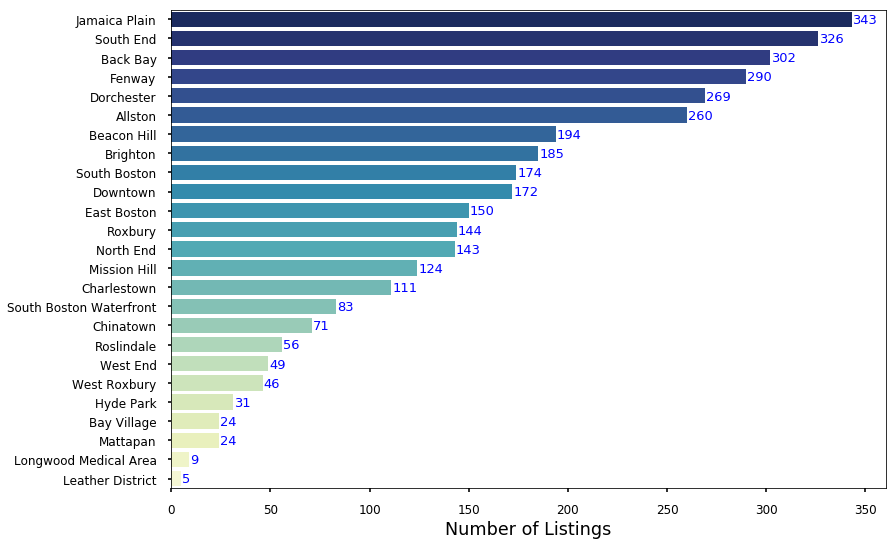

In [68]:
boslis_byneighood = boston_listings.groupby(['neighbourhood_cleansed'])['id'].agg(['count']) \
                                   .reset_index() \
                                   .sort_values(['count'], ascending=False) 
        
ax = sns.barplot(boslis_byneighood['count'], 
                                   boslis_byneighood['neighbourhood_cleansed'], palette="YlGnBu_r")
ax.set_xlabel("Number of Listings")
ax.set_ylabel("")
for p in ax.patches:
    width = p.get_width()
    ax.text(width+.5, #width - 1.5  ,
            p.get_y() + p.get_height()/2. + 0.2,
            '{:1.0f}'.format(width),
            ha='left',
            color='blue',
            fontsize=13)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [69]:
boston_cal_prices = boston_calendar.groupby('listing_id', as_index=False)[['price']].mean().round()
bos_listprice_nhood = pd.merge(boston_cal_prices, boston_listings[['id', 'neighbourhood_cleansed']], how='left', left_on=['listing_id'], right_on=['id'])
bos_listprice_nhood = bos_listprice_nhood.drop('id', 1)
bos_price_nhood = bos_listprice_nhood.groupby(['neighbourhood_cleansed'])['price'].agg(['mean']).round() \
                                   .reset_index() \
                                   .sort_values(['mean'], ascending=False) 
bos_price_nhood

,neighbourhood_cleansed,mean
13,Leather District,345.0
21,South Boston Waterfront,332.0
23,West End,328.0
6,Chinatown,313.0
2,Bay Village,295.0
10,Fenway,273.0
1,Back Bay,273.0
8,Downtown,273.0
3,Beacon Hill,247.0
22,South End,226.0


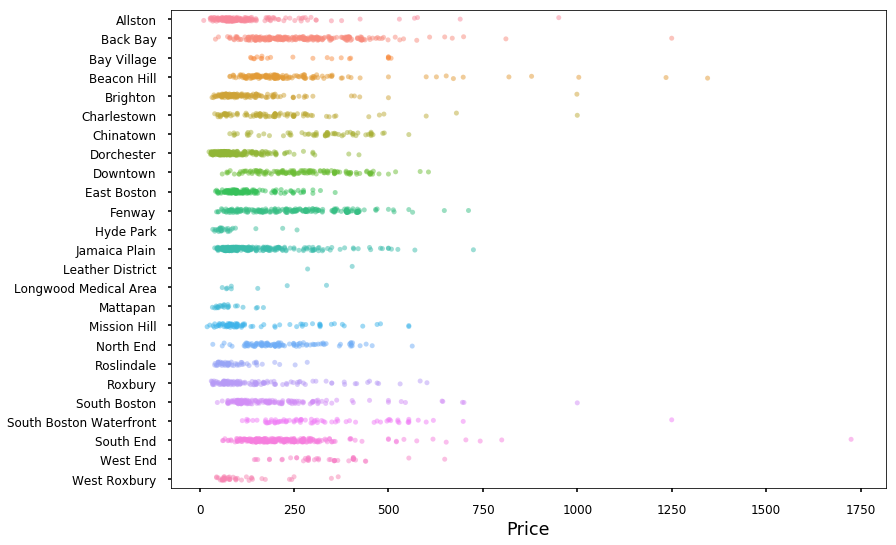

In [70]:
ax = sns.stripplot(x='price', y='neighbourhood_cleansed', 
              data=bos_listprice_nhood.loc[(bos_listprice_nhood.price < 2000) & (bos_listprice_nhood.price > 0)],
              order=np.sort(bos_listprice_nhood.neighbourhood_cleansed.unique()),
              jitter=0.1, alpha=0.5, orient='h')
ax.set_xlabel("Price")
ax.set_ylabel("");
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

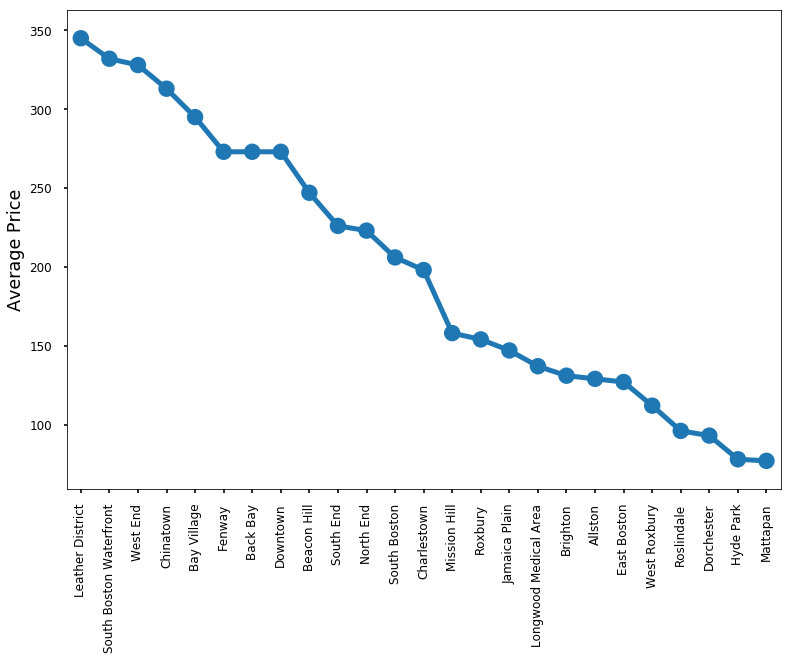

In [71]:
ax = sns.pointplot(x = bos_price_nhood['neighbourhood_cleansed'], y = bos_price_nhood['mean'])
ax.set_xlabel("")
ax.set_ylabel("Average Price")
plt.yticks(fontsize=12)
plt.xticks(rotation=90, fontsize=12);

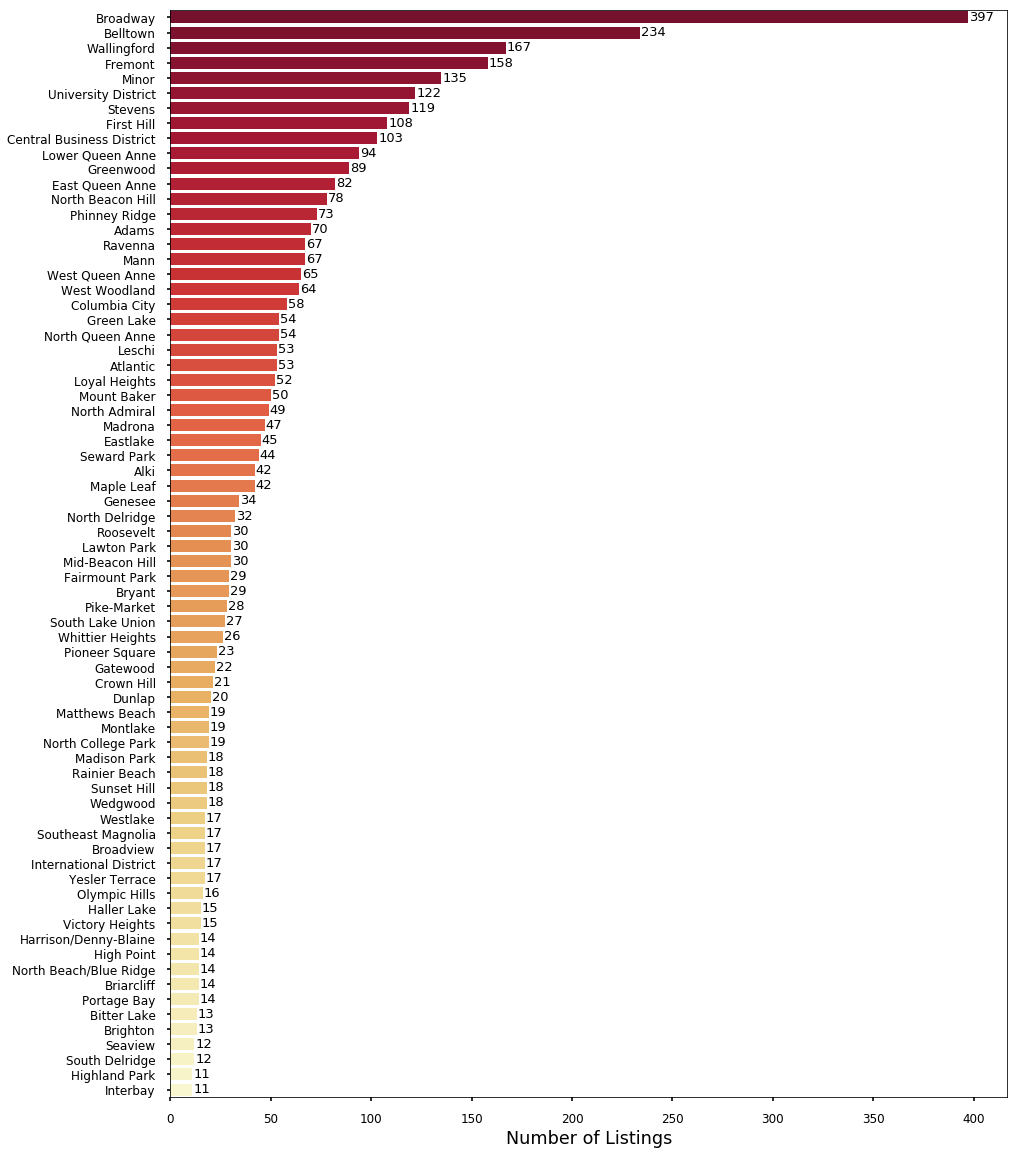

In [72]:
sealis_byneighood = seattle_listings.groupby(['neighbourhood_cleansed'])['id'].agg(['count']) \
                                   .reset_index() \
                                   .sort_values(['count'], ascending=False) 
fig, ax = plt.subplots()

fig.set_size_inches(15, 20)

ax = sns.barplot(y='neighbourhood_cleansed', x='count', 
                 data=sealis_byneighood.loc[(sealis_byneighood['count'] > 10)],palette="YlOrRd_r", ax=ax)
ax.set_xlabel("Number of Listings")
ax.set_ylabel("")
for p in ax.patches:
    width = p.get_width()
    ax.text(width+.5, #width - 1.5  ,
            p.get_y() + p.get_height()/2. + 0.2,
            '{:1.0f}'.format(width),
            ha='left',
            color='black',
            fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [73]:
seattle_cal_prices = seattle_calendar.groupby('listing_id', as_index=False)[['price']].mean().round()
sea_listprice_nhood = pd.merge(seattle_cal_prices, seattle_listings[['id', 'neighbourhood_cleansed']], how='left', left_on=['listing_id'], right_on=['id'])
sea_listprice_nhood = sea_listprice_nhood.drop('id', 1)
sea_price_nhood = sea_listprice_nhood.groupby(['neighbourhood_cleansed'])['price'].agg(['mean']).round() \
                                   .reset_index() \
                                   .sort_values(['mean'], ascending=False) 
sea_price_nhood

,neighbourhood_cleansed,mean
61,Portage Bay,238.0
73,Southeast Magnolia,235.0
85,Windermere,224.0
6,Briarcliff,214.0
12,Central Business District,200.0
81,West Queen Anne,200.0
83,Westlake,199.0
58,Pike-Market,192.0
4,Belltown,190.0
1,Alki,188.0


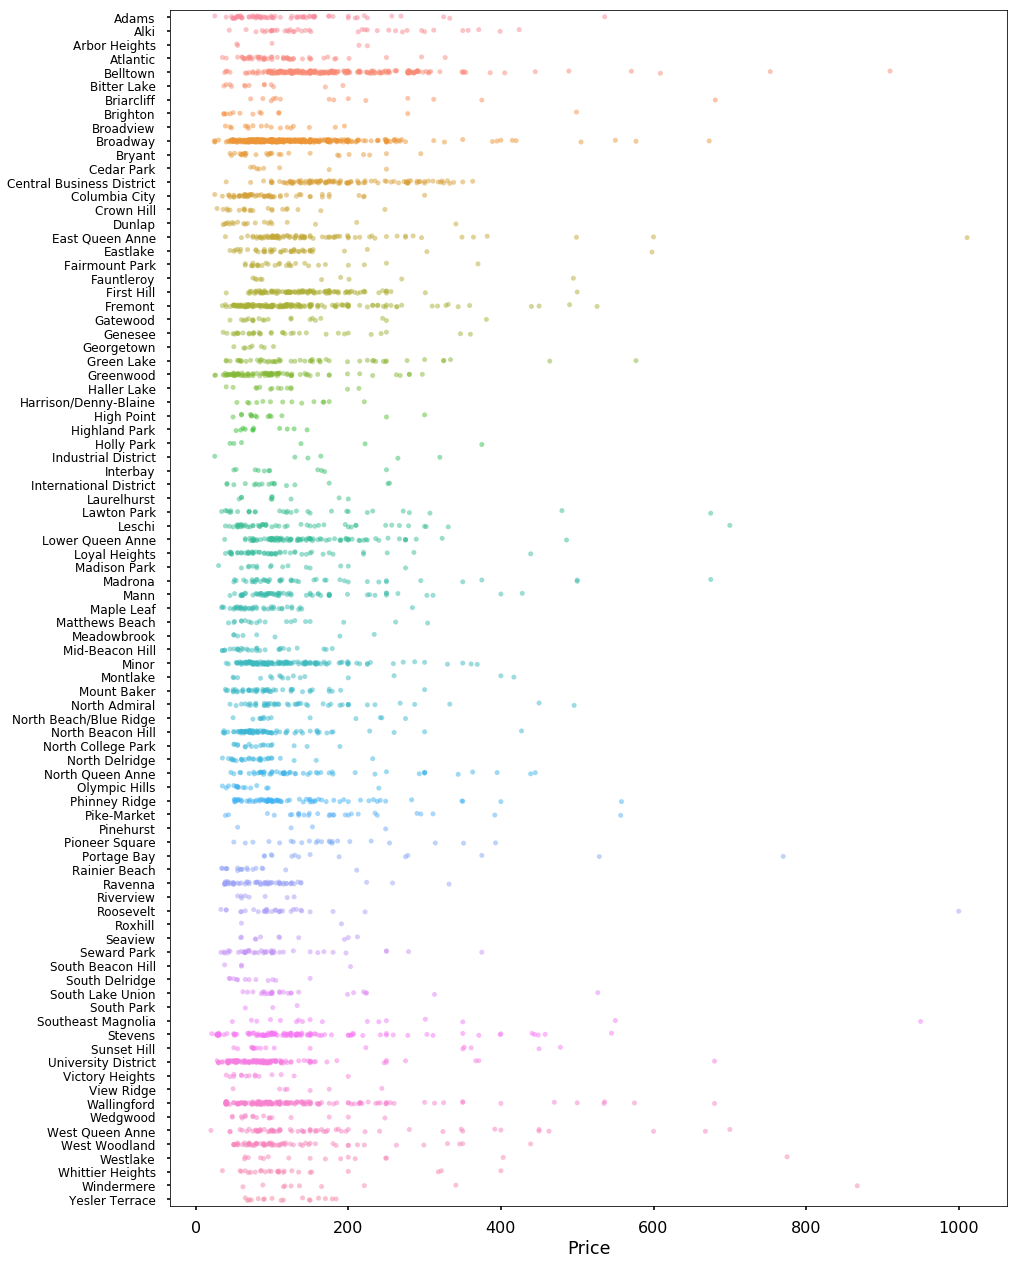

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 22) 
sns.stripplot(x='price', y='neighbourhood_cleansed', 
              data=sea_listprice_nhood.loc[(sea_listprice_nhood.price > 10) & (sea_listprice_nhood.price < 1200)],
              order=np.sort(sea_listprice_nhood.neighbourhood_cleansed.unique()),
              jitter=0.1, alpha=0.5, orient='h', ax=ax)
ax.set_xlabel("Price")
ax.set_ylabel("")
plt.yticks(fontsize=12);

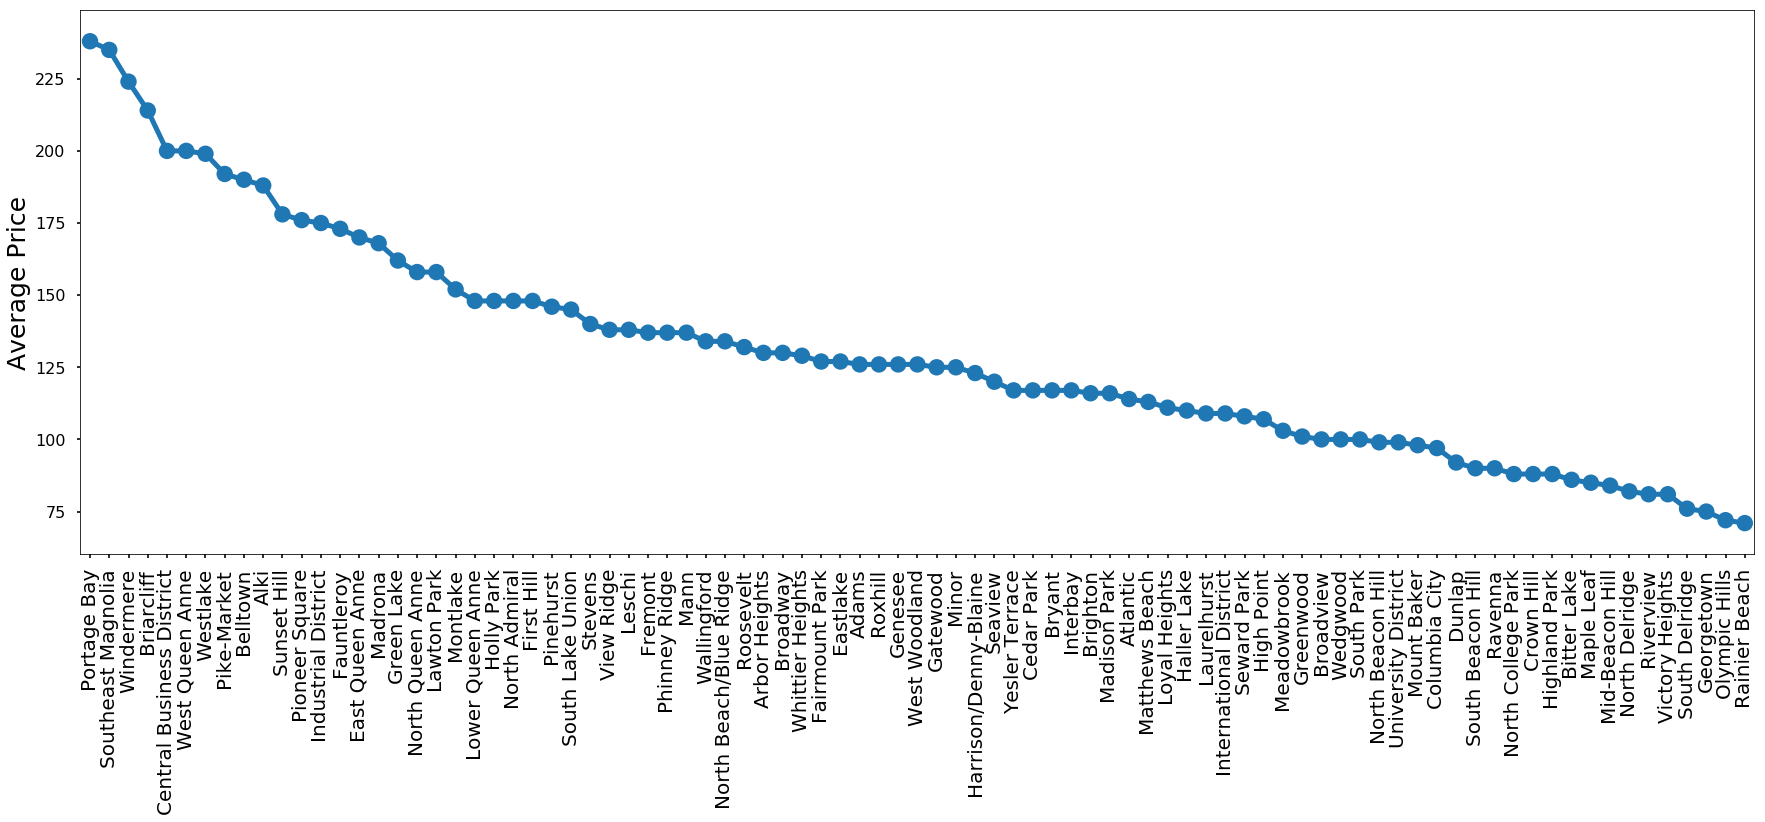

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 10) 
ax = sns.pointplot(x = sea_price_nhood['neighbourhood_cleansed'], y = sea_price_nhood['mean'])
ax.set_xlabel("")
ax.set_ylabel("Average Price", fontsize=25)
plt.xticks(fontsize=20, rotation=90);